Data from UTD19 at https://utd19.ethz.ch/. We filtered the information related to the city of Darmstadt from both files outliers. It is stored in raw.

In [ ]:
import pandas as pd

In [2]:
detectors_darmstadt=pd.read_csv('raw/detectors_darmstadt_data.csv')
darmstadt= pd.read_csv('raw/darmstadt_data.csv')
detectors_darmstadt, darmstadt

(        detid    length       pos          fclass               road  limit  \
 0       K1D30  0.108952  0.035244    primary_link  Am Kavalleriesand     50   
 1       K1D20  0.035918  0.022714         primary        Rheinstraße     50   
 2       K1D21  0.276728  0.237951         primary        Rheinstraße     50   
 3       K1D22  0.275295  0.235496         primary        Rheinstraße     50   
 4       K1D41  0.538958  0.500831  secondary_link  Am Kavalleriesand     50   
 ..        ...       ...       ...             ...                ...    ...   
 387   K168D32  0.084965  0.050150       secondary  Am Kavalleriesand     50   
 388   K168D43  0.033008  0.021287           other   Mina-Rees-Straße     30   
 389   K168D44  0.262572  0.014059           other   Mina-Rees-Straße     30   
 390   K170D52  0.449658  0.408480       secondary  Carl-Schenck-Ring     50   
 391  K170D112  0.375477  0.337752       secondary  Carl-Schenck-Ring     50   
 
       citycode  lanes  linkid      lo

In [15]:
darmstadt_total= pd.merge(darmstadt, detectors_darmstadt)
# select important variable
darmstadt_selected_data= darmstadt_total[['day','interval','detid', 'flow']]

# change interval to datetime
darmstadt_selected_data['day'] = pd.to_datetime(darmstadt_selected_data['day'])
darmstadt_selected_data['interval'] = pd.to_timedelta(darmstadt_selected_data['interval'], unit='s')
darmstadt_selected_data['datetime'] = darmstadt_selected_data['day'] + darmstadt_selected_data['interval']

darmstadt_selected_data=darmstadt_selected_data.drop(['day', 'interval'], axis=1)

final_darmstadt_data= darmstadt_selected_data[['datetime', 'detid', 'flow']]

final_darmstadt_data.to_csv('Processed/final_darmstadt_data.csv', index=True)
final_darmstadt_data

/var/folders/lb/5njcscl57h5_l0d572ct8nm00000gn/T/ipykernel_40438/1989266.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darmstadt_selected_data['day'] = pd.to_datetime(darmstadt_selected_data['day'])
/var/folders/lb/5njcscl57h5_l0d572ct8nm00000gn/T/ipykernel_40438/1989266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  darmstadt_selected_data['interval'] = pd.to_timedelta(darmstadt_selected_data['interval'], unit='s')
/var/folders/lb/5njcscl57h5_l0d572ct8nm00000gn/T/ipykernel_40438/1989266.py:8: Se

,datetime,detid,flow
0,2015-10-05 00:00:00,K1D20,0.0
1,2015-10-05 00:03:00,K1D20,0.0
2,2015-10-05 00:06:00,K1D20,0.0
3,2015-10-05 00:09:00,K1D20,0.0
4,2015-10-05 00:12:00,K1D20,0.0
...,...,...,...
4677921,2016-04-22 10:51:00,K170D52,20.0
4677922,2016-04-22 10:54:00,K170D52,60.0
4677923,2016-04-22 11:45:00,K170D52,0.0
4677924,2016-04-22 13:30:00,K170D52,20.0


Up to this point, tables of data related to traffic flow at each signal have been generated.

Select K1D43 on the main road for training.

In [25]:
K1D43 = final_darmstadt_data[final_darmstadt_data['detid'] == 'K1D43']
K1D43.reset_index(drop=True, inplace=True)
K1D43.to_csv('Processed/K1D43/K1D43_data.csv', index=True)  

In [27]:
# expected interval 3 minutes
expected_interval = pd.Timedelta(minutes=3)

# Checking two neighbouring points in time
time_diff = K1D43['datetime'].diff()

# bigger than expected interval
breaks = time_diff > expected_interval

# show 
if breaks.any():
    print("Discovering time breaks:")
    break_indices = breaks[breaks].index
    for index in break_indices:
        prev_time = final_darmstadt_data['datetime'][index - 1] if index > 0 else "Starting"
        next_time = final_darmstadt_data['datetime'][index + 1] if index < len(final_darmstadt_data) - 1 else "Ending"
        print(f"Before break time: {prev_time}, After break time: {next_time}")
else:
    print("Don't find time breaks")


Discovering time breaks:
Before break time: 2015-10-05 08:27:00, After break time: 2015-10-06 15:21:00
Before break time: 2015-10-08 09:12:00, After break time: 2015-10-08 09:21:00
Before break time: 2015-10-09 23:57:00, After break time: 2015-10-12 00:03:00
Before break time: 2015-10-13 12:36:00, After break time: 2015-10-13 12:45:00
Before break time: 2015-09-21 10:33:00, After break time: 2015-09-21 10:45:00
Before break time: 2015-09-25 06:57:00, After break time: 2015-09-25 07:30:00
Before break time: 2015-09-25 07:30:00, After break time: 2015-09-25 08:18:00
Before break time: 2015-09-25 08:09:00, After break time: 2015-09-25 08:21:00
Before break time: 2015-09-25 23:57:00, After break time: 2015-10-01 00:03:00
Before break time: 2015-09-29 15:09:00, After break time: 2015-09-30 01:39:00
Before break time: 2015-09-30 02:36:00, After break time: 2015-09-30 02:51:00
Before break time: 2015-09-30 02:51:00, After break time: 2015-09-30 04:48:00
Before break time: 2015-09-30 06:06:00,

Selection of 2016 data as valid data.

Available time periods are 2016-04-18 00:03:00 to 2016-04-22 23:57:00, 2016-04-25 00:03:00 to 2016-04-29 23:57:00, 2016-05-02 00:03:00 to 2016-05-04 23:57:00.

In [30]:
periods = [
    ('2016-04-18 00:03:00', '2016-04-22 23:57:00'),
    ('2016-04-25 00:03:00', '2016-04-29 23:57:00'),
    ('2016-05-02 00:03:00', '2016-05-04 23:57:00')
]
for i, (start, end) in enumerate(periods, 1):
    period_data = K1D43[(K1D43['datetime'] >= start) & (K1D43['datetime'] <= end)]
    period_data.to_csv(f'Processed/K1D43/K1D43_data_period_{i}.csv', index=True)

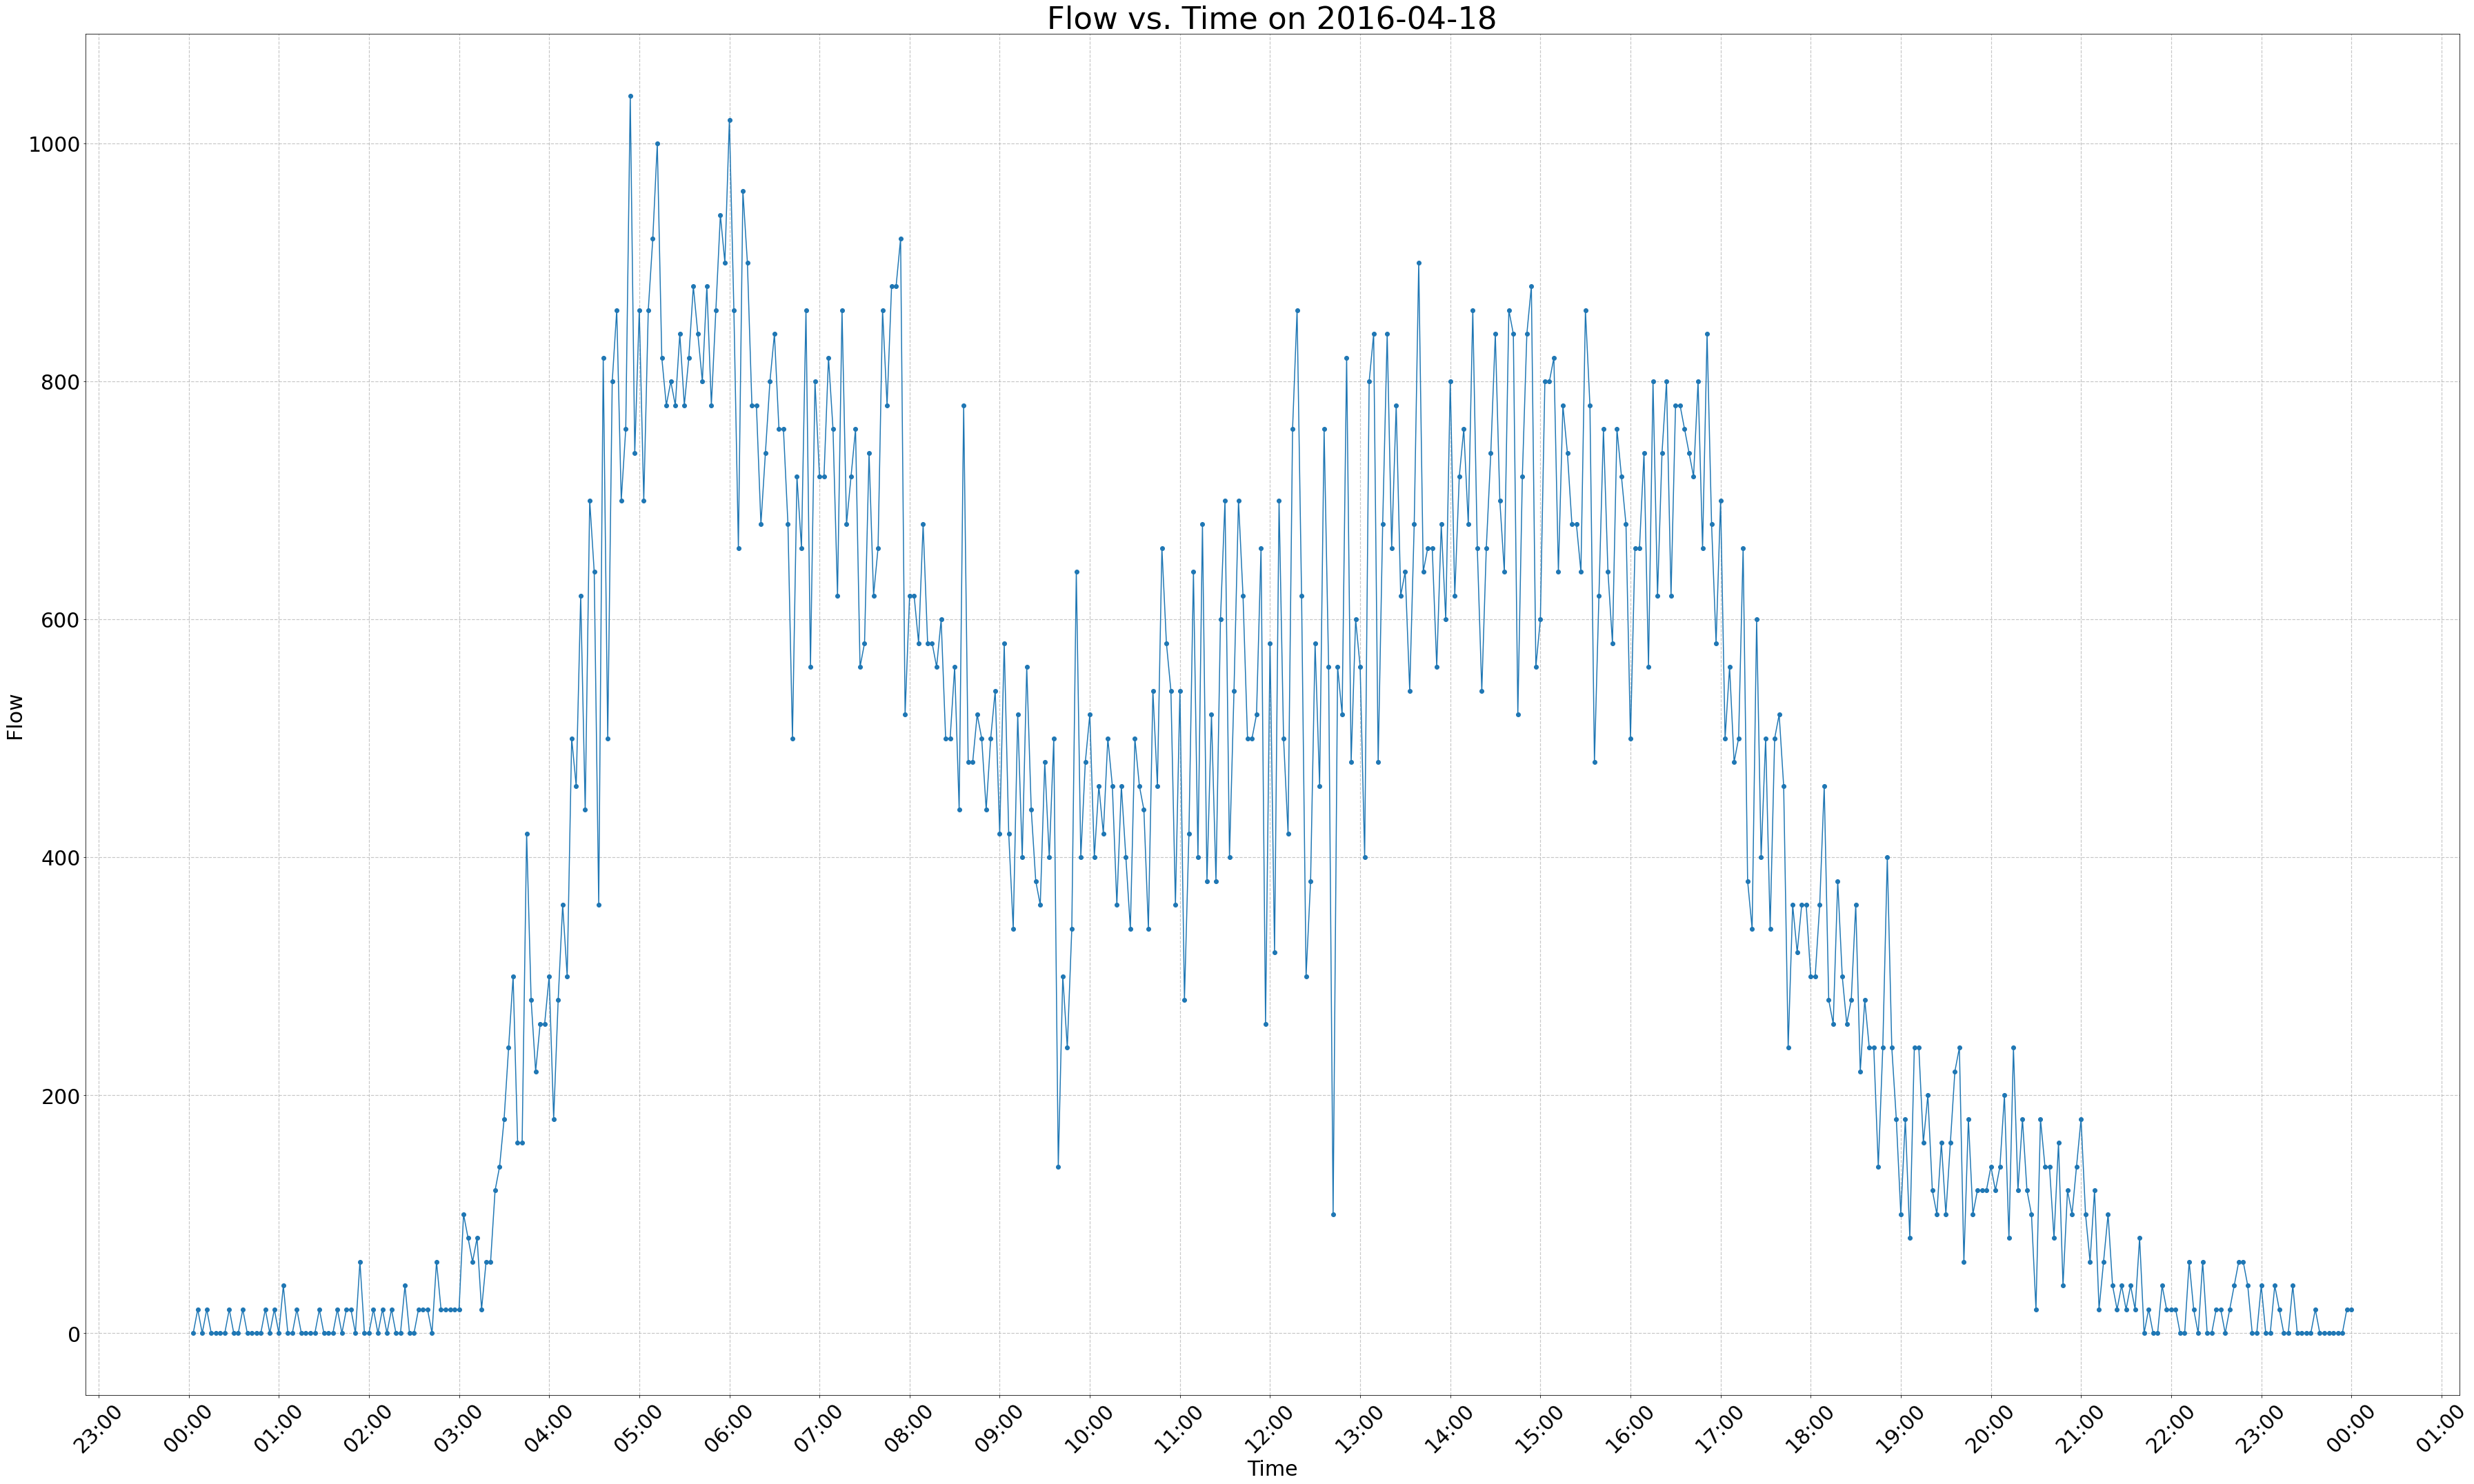

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoLocator

K1D43_period1 = pd.read_csv('Processed/K1D43/K1D43_data_period_1.csv')
if not isinstance(K1D43_period1.index, pd.DatetimeIndex):
    K1D43_period1['datetime'] = pd.to_datetime(K1D43_period1['datetime'])
    K1D43_period1.set_index('datetime', inplace=True)

# 18data
start_date = pd.Timestamp('2016-04-18')
end_date = pd.Timestamp('2016-04-19')
daily_data = K1D43_period1[start_date:end_date]


plt.figure(figsize=(50, 30))
plt.plot(daily_data.index, daily_data['flow'], marker='o') # 使用点标记以增加可见性

plt.title("Flow vs. Time on 2016-04-18",fontsize=45)
plt.xlabel('Time',fontsize=30)
plt.ylabel('Flow',fontsize =30)

#  x axis: one hour 
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.gca().yaxis.set_major_locator(AutoLocator())

plt.grid(True, which='both', linestyle='--', linewidth=1.2, alpha=0.7)

plt.xticks(rotation=45,fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

By looking at the images we can delineate, morning peak, evening peak and noon periods.

In [36]:
morning_peak= K1D43_period1.between_time('05:00:00', '10:00:00')

noon= K1D43_period1.between_time('10:00:00', '14:00:00')

evening_peak= K1D43_period1.between_time('14:00:00', '18:00:00')